In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

/Users/nheinsohn/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.980317
Test set score: 0.970900


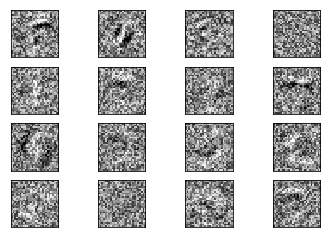

In [2]:
# A learning example from scikit learn

# Now, we use data from the openml DB -> https://www.openml.org/d/554 (<- the number is the DB id)
# We stay with the notation X and y

X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X / 255. # We do some normalization here, because the pixels of the images have gray values \in [0;255]

# old school way to split the data; change if you want 
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

mlp = MLPClassifier(hidden_layer_sizes=(100, 100), solver='sgd', learning_rate='constant', learning_rate_init=0.01, max_iter=100) # design your network

# Yes, it is still that easy to train a network
mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))


# Do not change this part; It is a nice visualization of your weights (mlp.coefs). Do they change when varying your parameter? 
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()